In [145]:
import cv2
import os
import numpy as np
from IPython.display import display, Image

In [146]:
video = cv2.VideoCapture("video.mp4")
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total number of frames: {total_frames}")

Total number of frames: 149


In [147]:
count = 1
for i in range(total_frames):
    success, image = video.read()
    if i % 5 != 0:
        continue
    cv2.imwrite(f"frames/frame{count}.jpg", image)
    count += 1
    if count > 30:
        break

In [148]:
input_folder = "frames"
target_width = 600
target_height = 400
images = []

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)
        resized_image = cv2.resize(original_image, (target_width, target_height))
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        images.append(grayscale_image.flatten())       

In [149]:
H = np.array(images)
H = H.T
H.shape

(240000, 30)

In [150]:
column_means = np.mean(H, axis=0)
A = H - column_means

In [151]:
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

In [152]:
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvalue = eigenvalues[max_eigenvalue_index]
max_eigenvector = eigenvectors[:, max_eigenvalue_index]
print(f"Max eigenvalue of A.T @ A (and A @ A.T): {max_eigenvalue}")
print(f"Max eigenvector of A.T @ A: {max_eigenvector}")
max_eigenvector = A @ max_eigenvector
print(f"Max eigenvector of A @ A.T: {max_eigenvector}")

Max eigenvalue of A.T @ A (and A @ A.T): 14222278384.61484
Max eigenvector of A.T @ A: [-0.15531582 -0.19372009 -0.16221933 -0.19632844 -0.17708692 -0.18745322
 -0.17629928 -0.18883025 -0.18357966 -0.17216131 -0.18113584 -0.17937463
 -0.18188098 -0.18641337 -0.18292607 -0.18743669 -0.19157756 -0.17849841
 -0.17403319 -0.1952148  -0.17466532 -0.19316535 -0.18971399 -0.18421343
 -0.19769459 -0.19139633 -0.1709026  -0.17497526 -0.19654547 -0.16317022]
Max eigenvector of A @ A.T: [725.62662034 719.08748362 645.67633456 ... 580.50627413 677.69249728
 727.25921044]


In [153]:
min_eigenvalue_index = np.argmin(eigenvalues)
min_eigenvalue = eigenvalues[min_eigenvalue_index]
min_eigenvector = eigenvectors[:, min_eigenvalue_index]
print(f"Min eigenvalue of A.T @ A (and A @ A.T): {min_eigenvalue}")
print(f"Min eigenvector of A.T @ A: {min_eigenvector}")
min_eigenvector = A @ min_eigenvector
print(f"Min eigenvector of A @ A.T: {min_eigenvector}")

Min eigenvalue of A.T @ A (and A @ A.T): 147179.46346602283
Min eigenvector of A.T @ A: [ 1.83572243e-03  8.02689034e-05  8.41467862e-03  1.05934991e-02
  9.96422555e-03 -1.02771072e-03  4.57463207e-03 -3.68326433e-03
  3.26898822e-03  1.98653104e-03  1.23491597e-01 -2.34743410e-03
 -1.21964456e-02  5.49315752e-01 -2.52573256e-01  4.66921957e-01
 -3.51388145e-01 -3.49522829e-01 -4.43047307e-04 -3.34019605e-01
 -2.54991001e-04  1.48205804e-01  1.14039343e-01 -8.37736675e-02
 -3.34258739e-03 -3.71322311e-02 -9.99063135e-03 -2.75187351e-03
  2.62784005e-03 -1.05291072e-03]
Min eigenvector of A @ A.T: [ 1.10496066 -1.06742623 -2.57118663 ...  0.72149011  0.702886
 -0.09822695]


In [154]:
def convert_array_to_image(vector):
    flattened_array = np.array(vector, dtype=np.uint8)
    desired_size = (400, 600) 
    reshaped_image = flattened_array.reshape(desired_size)
    display(Image(data=cv2.imencode('.png', reshaped_image)[1].tobytes()))

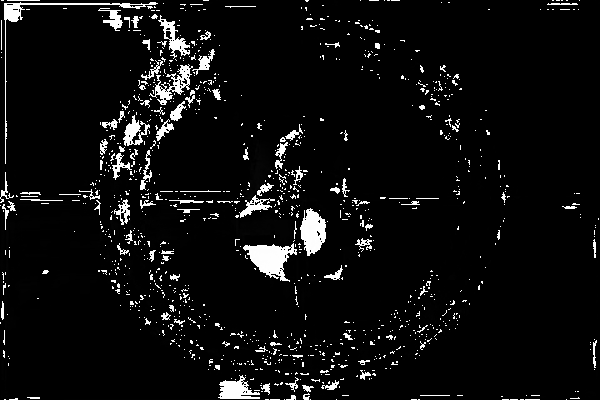

In [155]:
convert_array_to_image(min_eigenvector)

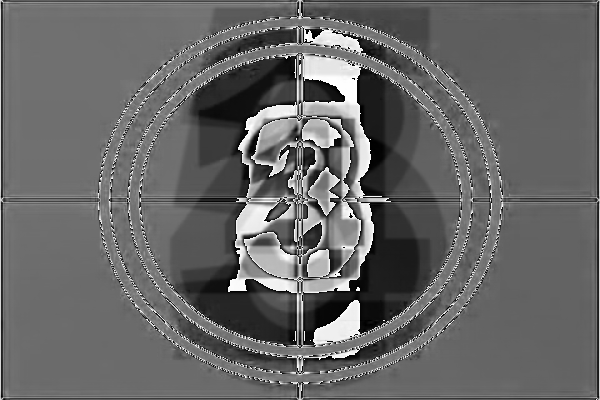

In [156]:
convert_array_to_image(max_eigenvector)